In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flatfile_265TPD.csv')

In [3]:
df

,Date,MelterCombBlower_1_flow_rate,MelterCombBlower_2_flow_rate,ChimneyDraft_0_pressure,DistributorForeEarthAir_0_pressure,DistributorGas_0_flow_rate,DistributorGas_0_pressure,DistributorZonePyrometer_1_temperature,DistributorZonePyrometer_2_temperature,DistributorZonePyrometer_3_temperature,...,IsmHp_j2_pressure,IsmHp_j3a_pressure,Draw (TPD),Cullet%,Melter Optical,Melter Bottom (T/C-207),Throat Riser (T/C-208),Dist Zone3,Melter SFC (KCal),Seed Count
0,01-10-2021,-30.507391,16487.71178,-49.911962,900.049874,78.400640,-7.600755,1250.754829,1274.823235,1302.199449,...,39.417150,39.912458,275,40,1594,1093,1296,1302,1067,45.0
1,02-10-2021,-27.461394,16296.43969,-49.954660,900.072751,75.991426,-7.570322,1252.186058,1275.184932,1304.704008,...,39.563286,39.989401,275,40,1595,1094,1299,1305,1073,45.0
2,03-10-2021,-27.324396,16257.36205,-49.930422,900.139719,76.243055,-7.560460,1249.744569,1268.934077,1303.540191,...,39.755841,39.966441,275,40,1594,1094,1298,1303,1043,45.0
3,04-10-2021,-30.348439,16424.30439,-49.836834,899.992319,79.262181,-7.588933,1250.841312,1269.698285,1301.559022,...,39.696308,39.874099,275,40,1594,1093,1296,1302,1068,46.0
4,05-10-2021,-30.739372,16533.39310,-49.673467,900.031961,79.961293,-7.554459,1248.922963,1268.267056,1300.325706,...,39.714394,39.640775,275,40,1594,1091,1294,1300,1050,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,09-06-2022,-51.835516,14701.72399,-49.684768,899.969801,69.564689,-7.594169,1239.545918,1276.602277,1312.610384,...,39.605746,40.268850,275,49,1590,1102,1313,1313,1037,45.0
252,10-06-2022,-48.758782,14737.78505,-49.568978,899.975521,69.746364,-7.575896,1239.738469,1276.327865,1313.295944,...,39.766038,40.292616,275,49,1589,1100,1313,1313,1035,45.0
253,11-06-2022,-50.254090,14723.16443,-49.429044,899.960035,69.180208,-7.615303,1240.167285,1277.510652,1313.351979,...,39.620711,40.172320,276,49,1589,1098,1315,1314,1037,46.0
254,12-06-2022,-44.225085,14714.22203,-49.618784,899.956951,68.719093,-7.709584,1239.994187,1277.205049,1313.254650,...,39.698862,40.240421,275,49,1588,1100,1315,1313,1026,44.0


In [4]:
df.columns

Index(['Date', 'MelterCombBlower_1_flow_rate', 'MelterCombBlower_2_flow_rate',
       'ChimneyDraft_0_pressure', 'DistributorForeEarthAir_0_pressure',
       'DistributorGas_0_flow_rate', 'DistributorGas_0_pressure',
       'DistributorZonePyrometer_1_temperature',
       'DistributorZonePyrometer_2_temperature',
       'DistributorZonePyrometer_3_temperature',
       'DistributorZonePyrometer_4_temperature',
       'DistributorZonePyrometer_5_temperature',
       'DistributorZonePyrometer_6_temperature',
       'DistributorZonePyrometer_7_temperature', 'ForeEarthGas_0_flow_rate',
       'ForeEarthGas_0_pressure', 'Zone1Pyrometer1_j0_temperature',
       'Zone1Pyrometer2_j0_temperature', 'Zone2Pyrometer1_j0_temperature',
       'Zone2Pyrometer2_j0_temperature', 'Zone3Pyrometer_j0_temperature',
       'ZoneCondiPyrometer_j0_temperature', 'Zone1PyrometerL_j1_temperature',
       'Zone1PyrometerR_j1_temperature', 'Zone2Pyrometer_j1_temperature',
       'ZoneCondiPyrometer_j1_temperature',

In [7]:
# Histogram
li = ['Draw (TPD)', 'Cullet%', 'Melter Optical', 'Melter Bottom (T/C-207)','Throat Riser (T/C-208)', 'Dist Zone3','DistributorZonePyrometer_6_temperature','Zone1Pyrometer_j4_temperature','Zone1PyrometerL_j6_temperature']
for elem in li:
    arr = df[elem].to_numpy()
    sns.histplot(arr)
    elem = elem.replace('/','')
    elem = elem.replace('-','')
    elem = elem.replace('(','')
    elem = elem.replace(')','')
    plt.savefig('plots/hist/'+elem)
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Box Plots

## Box plots for Common data

In [8]:
df5 = pd.read_csv('flatfile_265TPD.csv')
df5.columns

Index(['Date', 'MelterCombBlower_1_flow_rate', 'MelterCombBlower_2_flow_rate',
       'ChimneyDraft_0_pressure', 'DistributorForeEarthAir_0_pressure',
       'DistributorGas_0_flow_rate', 'DistributorGas_0_pressure',
       'DistributorZonePyrometer_1_temperature',
       'DistributorZonePyrometer_2_temperature',
       'DistributorZonePyrometer_3_temperature',
       'DistributorZonePyrometer_4_temperature',
       'DistributorZonePyrometer_5_temperature',
       'DistributorZonePyrometer_6_temperature',
       'DistributorZonePyrometer_7_temperature', 'ForeEarthGas_0_flow_rate',
       'ForeEarthGas_0_pressure', 'Zone1Pyrometer1_j0_temperature',
       'Zone1Pyrometer2_j0_temperature', 'Zone2Pyrometer1_j0_temperature',
       'Zone2Pyrometer2_j0_temperature', 'Zone3Pyrometer_j0_temperature',
       'ZoneCondiPyrometer_j0_temperature', 'Zone1PyrometerL_j1_temperature',
       'Zone1PyrometerR_j1_temperature', 'Zone2Pyrometer_j1_temperature',
       'ZoneCondiPyrometer_j1_temperature',

In [9]:
df5.describe()['Melter SFC (KCal)']

count     256.000000
mean     1078.519531
std        87.755853
min       838.000000
25%      1026.000000
50%      1045.000000
75%      1073.000000
max      1335.000000
Name: Melter SFC (KCal), dtype: float64

In [10]:
df5["Type"] = ""*len(df5)
c1 = df5.index[(df5['Melter SFC (KCal)']>=838) & (df5['Melter SFC (KCal)']<=1026)]
c2 = df5.index[(df5['Melter SFC (KCal)']>1026) & (df5['Melter SFC (KCal)']<=1045)]
c3 = df5.index[(df5['Melter SFC (KCal)']>1045) & (df5['Melter SFC (KCal)'] <=1073)]
c4 = df5.index[(df5['Melter SFC (KCal)']> 1073) & (df5['Melter SFC (KCal)'] <= 1335)]
c1, c2, c3, c4
df5.loc[c1, "Type"] = "[838, 1026]"
df5.loc[c2, "Type"] = "[1026, 1045]"
df5.loc[c3, "Type"] = "[1045, 1073]"
df5.loc[c4, "Type"] = "[1073, 1335]"
df51 = df5.rename(columns = {"Type":"SFC_Metric"})

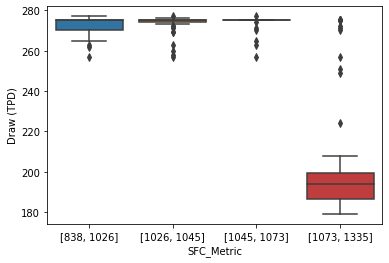

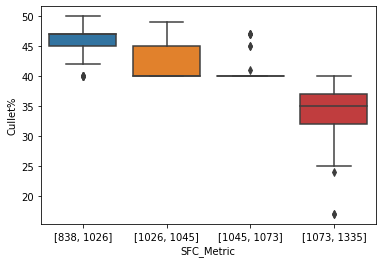

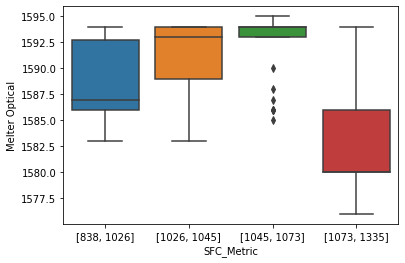

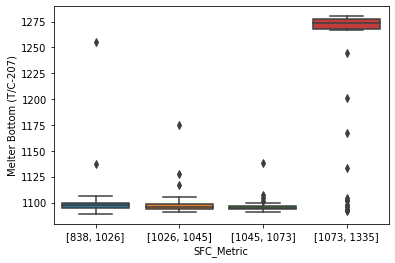

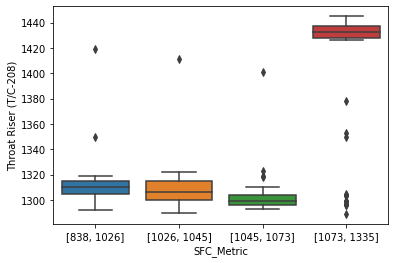

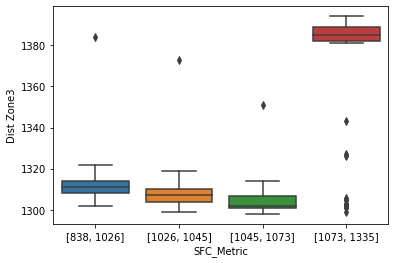

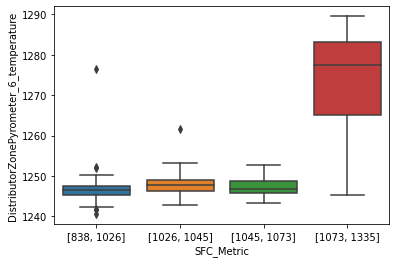

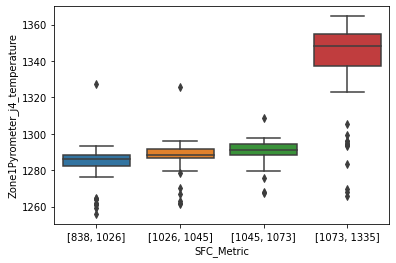

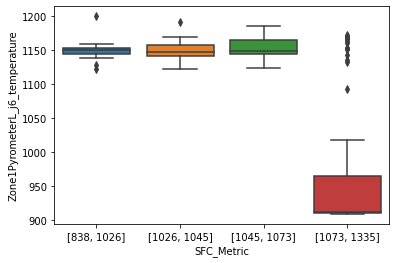

In [12]:
li = ['Draw (TPD)', 'Cullet%', 'Melter Optical', 'Melter Bottom (T/C-207)','Throat Riser (T/C-208)', 'Dist Zone3','DistributorZonePyrometer_6_temperature','Zone1Pyrometer_j4_temperature','Zone1PyrometerL_j6_temperature']
for elem in li:
    sns.boxplot(x="SFC_Metric",
                y=elem,
                data=df51, order=["[838, 1026]", "[1026, 1045]", "[1045, 1073]", "[1073, 1335]"])
    elem = elem.replace('/','')
    elem = elem.replace('-','')
    elem = elem.replace('(','')
    elem = elem.replace(')','')
    plt.savefig('plots/box/'+elem)
    plt.show()